In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


In [12]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclases = pd.api.types.CategoricalDtype(ordered=True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclases)

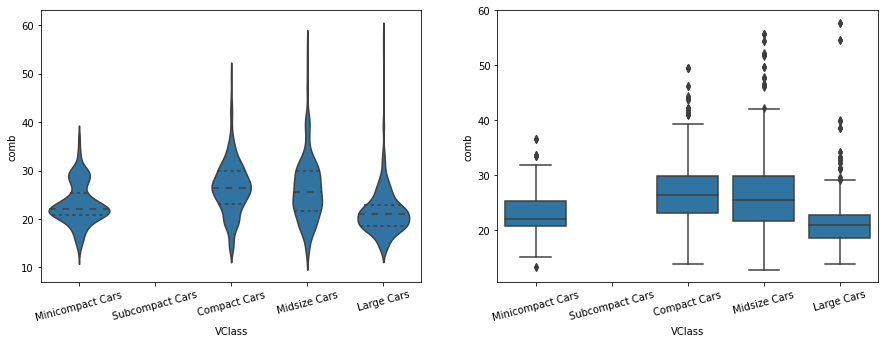

In [27]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner = 'quartile');#);
plt.xticks(rotation = 15);

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 1
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color);#, inner = None);
plt.xticks(rotation = 15);



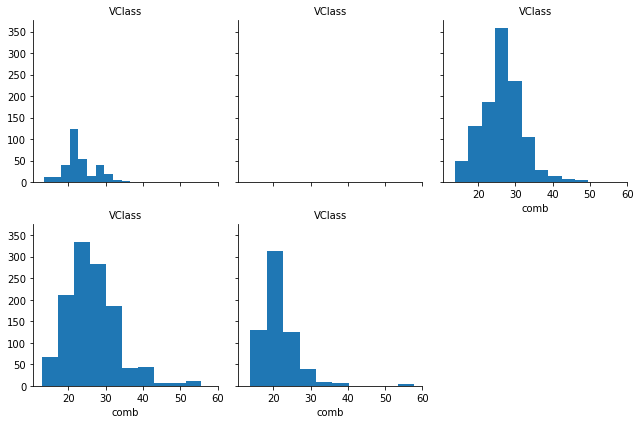

In [33]:
# group_means = df.groupby(['many_cat_var']).mean()
# group_order = group_means.sort_values(['num_var'], ascending = False).index

bins = np.arange(12,58+2,2)
g = sb.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3);#, size = 2, col_order = group_order)
g.map(plt.hist, 'comb');
g.set_titles('VClass')

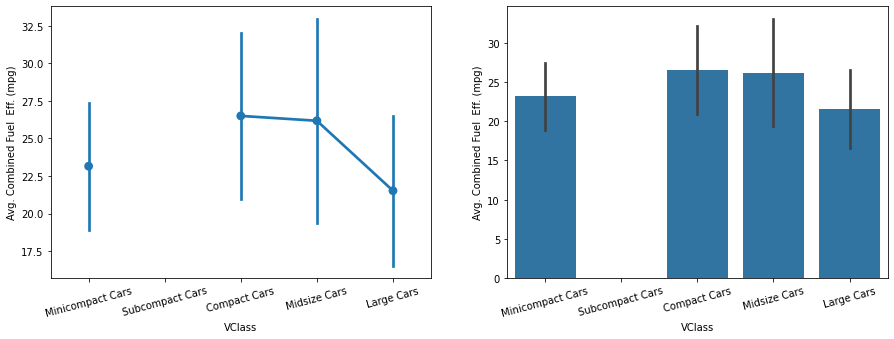

In [41]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots

base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.pointplot(data=fuel_econ, x='VClass', y='comb',
            ci = 'sd');
plt.xticks(rotation = 15);
plt.ylabel('Avg. Combined Fuel  Eff. (mpg)');

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 1
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color,
          #errwidth = 0 );# to hide error line
          ci = 'sd'); # showing standard deviation
plt.xticks(rotation = 15);
plt.ylabel('Avg. Combined Fuel  Eff. (mpg)');


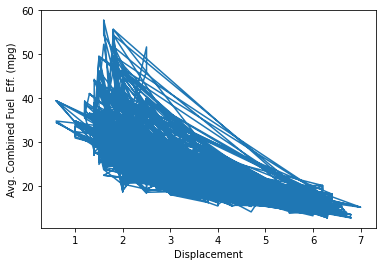

In [44]:
plt.errorbar(data=fuel_econ, x='displ', y='comb');
#             ,ci = 'sd');
plt.xlabel('Displacement');
plt.ylabel('Avg. Combined Fuel  Eff. (mpg)');


In [51]:

bins_e = np.arange(0.6, 7 + 0.2, 0.2)
bins_c = bins_e [:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest=True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

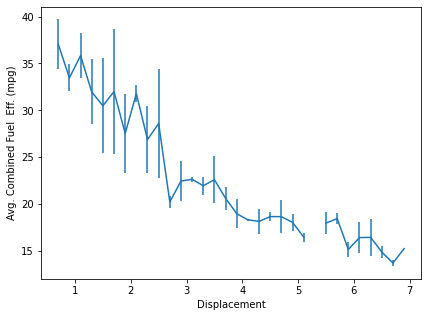

In [53]:
plt.figure(figsize = [15, 5]) # larger figure size for subplots


plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.errorbar(x=bins_c, y=comb_mean
            , yerr = comb_std); # adding deviation values line
plt.xlabel('Displacement');
plt.ylabel('Avg. Combined Fuel  Eff. (mpg)');

